In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install pgmpy
from pgmpy.estimators import PC
from pgmpy.models import BayesianNetwork
from sklearn.model_selection import train_test_split

     |████████████████████████████████| 1.9 MB 5.2 MB/s 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
covid_policies_df = pd.read_csv(
    "./Final_Data_Combined.csv", index_col=0
)
print(covid_policies_df.shape)
covid_policies_df.head()

(23860, 17)


,Country,Date,school_closures,workplace_closures,cancel_public_events,restrict_public_gathering,closure_public_transport,SHN_requirement,restriction_internal_movement,internation_travel_control,PI_Campaign,testing_policy,contact_tracing,Facial_Covering,Vaccine_policy,Confirmed_cases,Confirmed_Deathes
0,China,2020-05-02,2G,1G,1G,3G,0,0,1G,4.0,2G,3.0,2.0,2G,0,991.0,6.0
1,China,2020-05-03,2G,1G,1G,3G,0,0,1G,4.0,2G,3.0,2.0,2G,0,991.0,6.0
2,China,2020-05-04,2G,1G,1G,3G,0,0,1G,4.0,2G,3.0,2.0,2G,0,991.0,6.0
3,China,2020-05-05,2G,1G,1G,3G,0,0,1G,4.0,2G,3.0,2.0,2G,0,991.0,6.0
4,China,2020-05-06,2G,1G,1G,3G,0,0,1G,4.0,2G,3.0,2.0,2G,0,991.0,6.0


In [3]:
covid_policies_df["date"] = pd.to_datetime(covid_policies_df["Date"])
covid_policies_df["Country"] = covid_policies_df["Country"].str.lower()
covid_policies_df["Country"] = covid_policies_df["Country"].str.replace(" ", "_")
covid_policies_df.rename(columns={"Country": "country"}, inplace=True)
covid_policies_df.set_index(["country", "date"], inplace=True)
covid_policies_df.drop(columns=["Date"], inplace=True)
covid_policies_df.rename(
    columns={col: col.lower() for col in covid_policies_df.columns}, inplace=True
)
print(covid_policies_df.shape)
covid_policies_df.head()

(23860, 15)


school_closures workplace_closures cancel_public_events  \
country date                                                                 
china   2020-05-02              2G                 1G                   1G   
        2020-05-03              2G                 1G                   1G   
        2020-05-04              2G                 1G                   1G   
        2020-05-05              2G                 1G                   1G   
        2020-05-06              2G                 1G                   1G   

                   restrict_public_gathering closure_public_transport  \
country date                                                            
china   2020-05-02                        3G                        0   
        2020-05-03                        3G                        0   
        2020-05-04                        3G                        0   
        2020-05-05                        3G                        0   
        2020-05-06                        3G                        0   

                   shn_requirement restriction_internal_movement  \
country date                                                       
china   2020-05-02               0                            1G   
        2020-05-03               0                            1G   
        2020-05-04               0                            1G   
        2020-05-05               0                            1G   
        2020-05-06               0                            1G   

                    internation_travel_control pi_campaign  testing_policy  \
country date                                                                 
china   2020-05-02                         4.0          2G             3.0   
        2020-05-03                         4.0          2G             3.0   
        2020-05-04                         4.0          2G             3.0   
        2020-05-05                         4.0          2G             3.0   
        2020-05-06                         4.0          2G             3.0   

                    contact_tracing facial_covering vaccine_policy  \
country date                                                         
china   2020-05-02              2.0              2G              0   
        2020-05-03              2.0              2G              0   
        2020-05-04              2.0              2G              0   
        2020-05-05              2.0              2G              0   
        2020-05-06              2.0              2G              0   

                    confirmed_cases  confirmed_deathes  
country date                                            
china   2020-05-02            991.0                6.0  
        2020-05-03            991.0                6.0  
        2020-05-04            991.0                6.0  
        2020-05-05            991.0                6.0  
        2020-05-06            991.0                6.0

In [4]:
for column in covid_policies_df.columns:
    if pd.api.types.is_numeric_dtype(covid_policies_df[column].dtype):
        continue

    covid_policies_df[column] = (
        covid_policies_df[column].apply(lambda v: v[:1]).astype("int16")
    )

display(covid_policies_df.info())
covid_policies_df.head()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 23860 entries, ('china', Timestamp('2020-05-02 00:00:00')) to ('singapore', Timestamp('2022-02-27 00:00:00'))
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   school_closures                23860 non-null  int16  
 1   workplace_closures             23860 non-null  int16  
 2   cancel_public_events           23860 non-null  int16  
 3   restrict_public_gathering      23860 non-null  int16  
 4   closure_public_transport       23860 non-null  int16  
 5   shn_requirement                23860 non-null  int16  
 6   restriction_internal_movement  23860 non-null  int16  
 7   internation_travel_control     23860 non-null  float64
 8   pi_campaign                    23860 non-null  int16  
 9   testing_policy                 23860 non-null  float64
 10  contact_tracing                23860 non-null  float64
 11  facial_covering       

None

school_closures  workplace_closures  cancel_public_events  \
country date                                                                    
china   2020-05-02                2                   1                     1   
        2020-05-03                2                   1                     1   
        2020-05-04                2                   1                     1   
        2020-05-05                2                   1                     1   
        2020-05-06                2                   1                     1   

                    restrict_public_gathering  closure_public_transport  \
country date                                                              
china   2020-05-02                          3                         0   
        2020-05-03                          3                         0   
        2020-05-04                          3                         0   
        2020-05-05                          3                         0   
        2020-05-06                          3                         0   

                    shn_requirement  restriction_internal_movement  \
country date                                                         
china   2020-05-02                0                              1   
        2020-05-03                0                              1   
        2020-05-04                0                              1   
        2020-05-05                0                              1   
        2020-05-06                0                              1   

                    internation_travel_control  pi_campaign  testing_policy  \
country date                                                                  
china   2020-05-02                         4.0            2             3.0   
        2020-05-03                         4.0            2             3.0   
        2020-05-04                         4.0            2             3.0   
        2020-05-05                         4.0            2             3.0   
        2020-05-06                         4.0            2             3.0   

                    contact_tracing  facial_covering  vaccine_policy  \
country date                                                           
china   2020-05-02              2.0                2               0   
        2020-05-03              2.0                2               0   
        2020-05-04              2.0                2               0   
        2020-05-05              2.0                2               0   
        2020-05-06              2.0                2               0   

                    confirmed_cases  confirmed_deathes  
country date                                            
china   2020-05-02            991.0                6.0  
        2020-05-03            991.0                6.0  
        2020-05-04            991.0                6.0  
        2020-05-05            991.0                6.0  
        2020-05-06            991.0                6.0

In [5]:
country_to_population_map = {
    "hong_kong": 7500000,
    "china": 1448000000,
    "indonesia": 272000000,
    "singapore": 5450000,
    "malaysia": 32000000,
}

In [6]:
def compute_cases_bin(cases_per_mil):
    computed_bin = None
    if cases_per_mil <= 10000:
        computed_bin = 0
    elif cases_per_mil < 30000:
        computed_bin = 1
    elif cases_per_mil < 50000:
        computed_bin = 2
    elif cases_per_mil < 70000:
        computed_bin = 3
    elif cases_per_mil < 100000:
        computed_bin = 4
    elif cases_per_mil < 120000:
        computed_bin = 5
    else:
        computed_bin = 6

    return computed_bin

covid_policies_df["cases_per_mil"] = covid_policies_df.apply(lambda row: (row.confirmed_cases * 1000000)/ country_to_population_map[row.name[0]], axis=1)
covid_policies_df["cases_per_mil_cat"] = covid_policies_df["cases_per_mil"].apply(compute_cases_bin)
print(covid_policies_df.shape)

(23860, 17)


In [7]:
covid_policies_df = covid_policies_df.reset_index()

In [8]:
covid_policies_df.head()

,country,date,school_closures,workplace_closures,cancel_public_events,restrict_public_gathering,closure_public_transport,shn_requirement,restriction_internal_movement,internation_travel_control,pi_campaign,testing_policy,contact_tracing,facial_covering,vaccine_policy,confirmed_cases,confirmed_deathes,cases_per_mil,cases_per_mil_cat
0,china,2020-05-02,2,1,1,3,0,0,1,4.0,2,3.0,2.0,2,0,991.0,6.0,0.684392,0
1,china,2020-05-03,2,1,1,3,0,0,1,4.0,2,3.0,2.0,2,0,991.0,6.0,0.684392,0
2,china,2020-05-04,2,1,1,3,0,0,1,4.0,2,3.0,2.0,2,0,991.0,6.0,0.684392,0
3,china,2020-05-05,2,1,1,3,0,0,1,4.0,2,3.0,2.0,2,0,991.0,6.0,0.684392,0
4,china,2020-05-06,2,1,1,3,0,0,1,4.0,2,3.0,2.0,2,0,991.0,6.0,0.684392,0


In [9]:
for c in covid_policies_df.country.unique():
    exec(f"df_{c} = covid_policies_df[covid_policies_df.country == \"{c}\"]")
    eval(f"print(\"Size of df_{c}\",df_{c}.shape)")

Size of df_china (21199, 19)
Size of df_hong_kong (666, 19)
Size of df_indonesia (667, 19)
Size of df_malaysia (661, 19)
Size of df_singapore (667, 19)


In [10]:
df_china.columns = [f"{col}_China" for col in df_china.columns]
df_malaysia.columns = [f"{col}_Malaysia" for col in df_malaysia.columns]
df_indonesia.columns = [f"{col}_Indonesia" for col in df_indonesia.columns]
df_singapore.columns = [f"{col}_Singapore" for col in df_singapore.columns]
df_hong_kong.columns = [f"{col}_Hong_Kong" for col in df_hong_kong.columns]

In [11]:
# removing duplicate rows for same date (take max restriction for the specific date)
df_china = df_china.groupby("date_China").max().reset_index()

In [21]:
df_china.columns

Index(['date_China', 'country_China', 'school_closures_China',
       'workplace_closures_China', 'cancel_public_events_China',
       'restrict_public_gathering_China', 'closure_public_transport_China',
       'shn_requirement_China', 'restriction_internal_movement_China',
       'internation_travel_control_China', 'pi_campaign_China',
       'testing_policy_China', 'contact_tracing_China',
       'facial_covering_China', 'vaccine_policy_China',
       'confirmed_cases_China', 'confirmed_deathes_China',
       'cases_per_mil_China', 'cases_per_mil_cat_China'],
      dtype='object')

In [12]:
m1 = pd.merge(df_china, df_indonesia, left_on = "date_China", right_on = "date_Indonesia")
print(m1.shape)

(667, 38)


In [13]:
m2 = pd.merge(m1, df_malaysia, left_on = "date_Indonesia", right_on = "date_Malaysia")
print(m2.shape)

(661, 57)


In [14]:
m3 = pd.merge(m2, df_singapore, left_on = "date_Indonesia", right_on = "date_Singapore")
print(m3.shape)

(661, 76)


In [15]:
m4 = pd.merge(m3, df_hong_kong, left_on = "date_Indonesia", right_on = "date_Hong_Kong")
print(m4.shape)

(660, 95)


In [16]:
m4.columns

Index(['date_China', 'country_China', 'school_closures_China',
       'workplace_closures_China', 'cancel_public_events_China',
       'restrict_public_gathering_China', 'closure_public_transport_China',
       'shn_requirement_China', 'restriction_internal_movement_China',
       'internation_travel_control_China', 'pi_campaign_China',
       'testing_policy_China', 'contact_tracing_China',
       'facial_covering_China', 'vaccine_policy_China',
       'confirmed_cases_China', 'confirmed_deathes_China',
       'cases_per_mil_China', 'cases_per_mil_cat_China', 'country_Indonesia',
       'date_Indonesia', 'school_closures_Indonesia',
       'workplace_closures_Indonesia', 'cancel_public_events_Indonesia',
       'restrict_public_gathering_Indonesia',
       'closure_public_transport_Indonesia', 'shn_requirement_Indonesia',
       'restriction_internal_movement_Indonesia',
       'internation_travel_control_Indonesia', 'pi_campaign_Indonesia',
       'testing_policy_Indonesia', 'contact

In [17]:
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [18]:
m4.rename(columns={"date_China": "date"}, inplace=True)

HMM
Ref: https://rubikscode.net/2021/09/06/stock-price-prediction-using-hidden-markov-model/

In [19]:
!pip install hmmlearn

     |████████████████████████████████| 129 kB 6.6 MB/s 


In [70]:
import warnings
import logging
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn.hmm import GaussianHMM
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from docopt import docopt
 
# args = docopt(doc=__doc__, argv=None, help=True,
#               version=None, options_first=False)
 
# Supress warning in hmmlearn
warnings.filterwarnings("ignore")
# Change plot style to ggplot (for better and more aesthetic visualisation)
plt.style.use('ggplot')
 
 
class CasePredictor(object):
    def __init__(self, country, test_size=0.33,
                 n_hidden_states=6, n_latency_days=10,
                 n_steps_frac_change=50, n_steps_frac_high=10,
                 n_steps_frac_low=10):
        self._init_logger()
 
        self.country = country
        self.n_latency_days = n_latency_days
 
        self.hmm = GaussianHMM(n_components=n_hidden_states)
 
        self._split_train_test_data(test_size)
 
        self._compute_all_possible_outcomes(
            n_steps_frac_change, n_steps_frac_high, n_steps_frac_low)
 
    def _init_logger(self):
        self._logger = logging.getLogger(__name__)
        handler = logging.StreamHandler()
        formatter = logging.Formatter(
            '%(asctime)s %(name)-12s %(levelname)-8s %(message)s')
        handler.setFormatter(formatter)
        self._logger.addHandler(handler)
        self._logger.setLevel(logging.DEBUG)
 
    def _split_train_test_data(self, test_size):
        data = eval(f"df_{self.country.lower()}")
        _train_data, test_data = train_test_split(
            data, test_size=test_size, shuffle=False)
 
        self._train_data = _train_data
        self._test_data = test_data
 
    @staticmethod
    def _extract_features(data, country):
        #'school_closures_China',
        #  'workplace_closures_China', 'cancel_public_events_China',
        #  'restrict_public_gathering_China', 'closure_public_transport_China',
        #  'shn_requirement_China', 'restriction_internal_movement_China',
        #  'internation_travel_control_China', 'pi_campaign_China',
        #  'testing_policy_China', 'contact_tracing_China',
        #  'facial_covering_China', 'vaccine_policy_China'
        school_closure = np.array(data[f'school_closures_{country}'])
        workplace_closure = np.array(data[f"workplace_closures_{country}"])
        cancel_public_events = np.array(data[f'cancel_public_events_{country}'])
        restrict_public_gathering = np.array(data[f'restrict_public_gathering_{country}'])
        closure_public_transport = np.array(data[f"closure_public_transport_{country}"])
        cases_per_mil_cat = np.array(data[f"cases_per_mil_cat_{country}"])
 
        # Compute the fraction change in close, high and low prices
        # which would be used a feature
        # frac_change = (close_price - open_price) / open_price
        # frac_high = (high_price - open_price) / open_price
        # frac_low = (open_price - low_price) / open_price
 
        return np.column_stack((school_closure, workplace_closure, cancel_public_events, restrict_public_gathering, closure_public_transport, cases_per_mil_cat))
 
    def fit(self):
        self._logger.info('>>> Extracting Features')
        feature_vector = CasePredictor._extract_features(self._train_data, self.country)
        self._logger.info('Features extraction Completed <<<')
 
        self.hmm.fit(feature_vector)
 
    def _compute_all_possible_outcomes(self, n_steps_frac_change,
                                       n_steps_frac_high, n_steps_frac_low):
        # frac_change_range = np.linspace(-0.1, 0.1, n_steps_frac_change)
        # frac_high_range = np.linspace(0, 0.1, n_steps_frac_high)
        # frac_low_range = np.linspace(0, 0.1, n_steps_frac_low)
        school_closure_range = np.linspace(0, 4, 1)
        workplace_closure_range = np.linspace(0, 4, 1)
        cancel_public_events_range = np.linspace(0, 4, 1)
        restrict_public_gathering_range = np.linspace(0, 4, 1)
        closure_public_transport_range = np.linspace(0, 4, 1)
        cases_per_mil_cat_range = np.linspace(0, 7, 1)
 
        self._possible_outcomes = np.array(list(itertools.product(
            school_closure_range, workplace_closure_range, cancel_public_events_range, restrict_public_gathering_range, closure_public_transport_range, cases_per_mil_cat_range)))
 
    def _get_most_probable_outcome(self, day_index):
        previous_data_start_index = max(0, day_index - self.n_latency_days)
        previous_data_end_index = max(0, day_index - 1)
        previous_data = self._test_data.iloc[previous_data_end_index: previous_data_start_index]
        previous_data_features = CasePredictor._extract_features(
            previous_data, self.country)
 
        outcome_score = []
        for possible_outcome in self._possible_outcomes:
            total_data = np.row_stack(
                (previous_data_features, possible_outcome))
            outcome_score.append(self.hmm.score(total_data))
        most_probable_outcome = self._possible_outcomes[np.argmax(
            outcome_score)]
 
        return most_probable_outcome
 
    def predict_cases_and_policies(self, day_index):
        school_closure, workplace_closure, cancel_public_events, restrict_public_gathering, closure_public_transport, cases_per_mil_cat = self._get_most_probable_outcome(
            day_index)
        if cases_per_mil_cat == 0:
          low = 0
          high = 10000
        elif cases_per_mil_cat == 1:
          low = 10000
          high = 30000
        elif cases_per_mil_cat == 2:
          low = 30000
          high = 50000
        elif cases_per_mil_cat == 3:
          low = 50000
          high = 70000
        elif cases_per_mil_cat == 4:
          low = 70000
          high = 100000
        elif cases_per_mil_cat == 5:
          low = 100000
          high = 120000
        cases_per_mil = (high-low)/2
        #return cases_per_mil
        return school_closure, workplace_closure, cancel_public_events, restrict_public_gathering, closure_public_transport, cases_per_mil
 
    def predict_cases_for_days(self, days, with_plot=False):
        predicted_cases = []
        for day_index in tqdm(range(days)):
            predicted_cases.append(self.predict_cases_and_policies(day_index)[0])
 
        if with_plot:
            test_data = self._test_data[0: days]
            days = np.array(test_data[f'date_{self.country}'], dtype="datetime64[ms]")
            # actual_cases = test_data[f'cases_per_mil_{self.country}']
            actual_cases = test_data[f"school_closures_{self.country}"]
 
            fig = plt.figure()
 
            axes = fig.add_subplot(111)
            axes.plot(days, actual_cases, 'bo-', label="actual")
            axes.plot(days, predicted_cases, 'r+-', label="predicted")
            axes.set_title('{country}'.format(country=self.country))
 
            fig.autofmt_xdate()
 
            plt.legend()
            plt.show()
 
        return predicted_cases
 
 

2022-04-02 03:40:46,216 __main__     INFO     >>> Extracting Features
2022-04-02 03:40:46,216 __main__     INFO     >>> Extracting Features
2022-04-02 03:40:46,216 __main__     INFO     >>> Extracting Features
2022-04-02 03:40:46,216 __main__     INFO     >>> Extracting Features
2022-04-02 03:40:46,216 __main__     INFO     >>> Extracting Features
2022-04-02 03:40:46,216 __main__     INFO     >>> Extracting Features
2022-04-02 03:40:46,216 __main__     INFO     >>> Extracting Features
2022-04-02 03:40:46,216 __main__     INFO     >>> Extracting Features
2022-04-02 03:40:46,216 __main__     INFO     >>> Extracting Features
2022-04-02 03:40:46,216 __main__     INFO     >>> Extracting Features
2022-04-02 03:40:46,216 __main__     INFO     >>> Extracting Features
2022-04-02 03:40:46,216 __main__     INFO     >>> Extracting Features
2022-04-02 03:40:46,216 __main__     INFO     >>> Extracting Features
2022-04-02 03:40:46,216 __main__     INFO     >>> Extracting Features
2022-04-02 03:40:46,

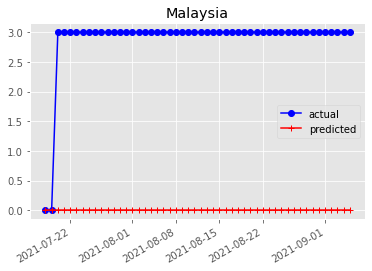

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [87]:
case_predictor = CasePredictor(country='Malaysia', n_latency_days=60)
case_predictor.fit()
case_predictor.predict_cases_for_days(50, with_plot=True)

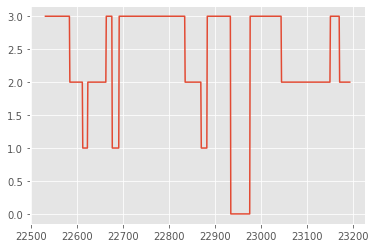

In [80]:
plt.plot(df_malaysia["school_closures_Malaysia"])

In [85]:
df_malaysia[~(df_malaysia["date_Malaysia"] < "2021-08-05")&(df_malaysia["date_Malaysia"] > "2021-07-19")]["school_closures_Malaysia"].value_counts()

2    129
3     72
Name: school_closures_Malaysia, dtype: int64